# Tensor Product

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `TensorProduct`
Tensor product of a sequence of block encodings.

Builds the block encoding as
$$
    B[U_1 ⊗ U_2 ⊗ \cdots ⊗ U_n] = B[U_1] ⊗ B[U_2] ⊗ \cdots ⊗ B[U_n]
$$

When each $B[U_i]$ is a $(\alpha_i, a_i, \epsilon_i)$-block encoding of $U_i$, we have that
$B[U_1 ⊗ \cdots ⊗ U_n]$ is a $(\prod_i \alpha_i, \sum_i a_i, \sum_i \alpha_i \epsilon_i)$-block
encoding of $U_1 ⊗ \cdots ⊗ U_n$.

#### Parameters
 - `block_encodings`: A sequence of block encodings. 

#### Registers
 - `system`: The system register.
 - `ancilla`: The ancilla register (present only if bitsize > 0).
 - `resource`: The resource register (present only if bitsize > 0). 

#### References
 - [Quantum algorithms: A survey of applications and end-to-end complexities](https://arxiv.org/abs/2310.03011). Dalzell et al. (2023). Ch. 10.2.


In [2]:
from qualtran.bloqs.block_encoding import TensorProduct

### Example Instances

In [3]:
from qualtran.bloqs.basic_gates import Hadamard, TGate
from qualtran.bloqs.block_encoding.unitary import Unitary

tensor_product_block_encoding = TensorProduct((Unitary(TGate()), Unitary(Hadamard())))

In [4]:
from attrs import evolve

from qualtran.bloqs.basic_gates import CNOT, TGate
from qualtran.bloqs.block_encoding.unitary import Unitary

u1 = evolve(Unitary(TGate()), alpha=0.5, ancilla_bitsize=2, resource_bitsize=1, epsilon=0.01)
u2 = evolve(Unitary(CNOT()), alpha=0.5, ancilla_bitsize=1, resource_bitsize=1, epsilon=0.1)
tensor_product_block_encoding_properties = TensorProduct((u1, u2))

In [5]:
import sympy

from qualtran.bloqs.basic_gates import Hadamard, TGate
from qualtran.bloqs.block_encoding.unitary import Unitary

alpha1 = sympy.Symbol('alpha1')
a1 = sympy.Symbol('a1')
eps1 = sympy.Symbol('eps1')
alpha2 = sympy.Symbol('alpha2')
a2 = sympy.Symbol('a2')
eps2 = sympy.Symbol('eps2')
tensor_product_block_encoding_symb = TensorProduct(
    (
        Unitary(TGate(), alpha=alpha1, ancilla_bitsize=a1, epsilon=eps1),
        Unitary(Hadamard(), alpha=alpha2, ancilla_bitsize=a2, epsilon=eps2),
    )
)

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([tensor_product_block_encoding, tensor_product_block_encoding_properties, tensor_product_block_encoding_symb],
           ['`tensor_product_block_encoding`', '`tensor_product_block_encoding_properties`', '`tensor_product_block_encoding_symb`'])

### Call Graph

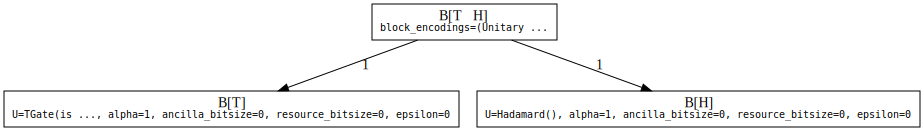

#### Counts totals:
 - `B[H]`: 1
 - `B[T]`: 1

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
tensor_product_block_encoding_g, tensor_product_block_encoding_sigma = tensor_product_block_encoding.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(tensor_product_block_encoding_g)
show_counts_sigma(tensor_product_block_encoding_sigma)